# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
x = {
    "coord": {
        "lon": -36.5092,
        "lat": -54.2811
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ]
}

x['weather'][0]['main']

'Clouds'

In [4]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + ('data/2.5/weather?units=Metric&APPID=' + weather_api_key)+ "&q=" + city.replace(" ", "+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | tsiombe
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | kailua-kona
Processing Record 7 of Set 1 | lautoka
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | puerto leguizamo
Processing Record 11 of Set 1 | howrah
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | ban phe
City not found. Skipping...
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | gadzhiyevo
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | birjand
Processing Record 22 of Set 

Processing Record 40 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | atafu village
Processing Record 43 of Set 4 | uturoa
Processing Record 44 of Set 4 | port hedland
Processing Record 45 of Set 4 | autlan de navarro
Processing Record 46 of Set 4 | fernie
Processing Record 47 of Set 4 | horta
Processing Record 48 of Set 4 | stuttgart
Processing Record 49 of Set 4 | kosong
Processing Record 0 of Set 5 | genhe
Processing Record 1 of Set 5 | mirny
Processing Record 2 of Set 5 | ulsteinvik
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | plettenberg bay
Processing Record 5 of Set 5 | chokwe
Processing Record 6 of Set 5 | new norfolk
Processing Record 7 of Set 5 | egilsstadir
Processing Record 8 of Set 5 | fort bragg
Processing Record 9 of Set 5 | caluula
Processing Record 10 of Set 5 | libreville
Processing Record 11 of Set 5 | lihue
Processing Record 12 of Set 5 | nuuk
Processing Record 13 of Set 5

Processing Record 31 of Set 8 | antofagasta
Processing Record 32 of Set 8 | souillac
Processing Record 33 of Set 8 | benghazi
Processing Record 34 of Set 8 | cenes de la vega
Processing Record 35 of Set 8 | caringin
Processing Record 36 of Set 8 | at taj
Processing Record 37 of Set 8 | sadjoavato
City not found. Skipping...
Processing Record 38 of Set 8 | pampierstad
Processing Record 39 of Set 8 | galesong
Processing Record 40 of Set 8 | kolonia town
Processing Record 41 of Set 8 | sinop
Processing Record 42 of Set 8 | raja
Processing Record 43 of Set 8 | labuan
Processing Record 44 of Set 8 | hargeysa
Processing Record 45 of Set 8 | kataragama
City not found. Skipping...
Processing Record 46 of Set 8 | siwa oasis
Processing Record 47 of Set 8 | qui nhon
Processing Record 48 of Set 8 | likiep
Processing Record 49 of Set 8 | lerwick
Processing Record 0 of Set 9 | sola
Processing Record 1 of Set 9 | lamu
Processing Record 2 of Set 9 | gillette
Processing Record 3 of Set 9 | sechura
Proc

Processing Record 22 of Set 12 | leua
Processing Record 23 of Set 12 | watford city
Processing Record 24 of Set 12 | loreto
Processing Record 25 of Set 12 | haslev
Processing Record 26 of Set 12 | tupiza
Processing Record 27 of Set 12 | lake havasu city
Processing Record 28 of Set 12 | ennis
Processing Record 29 of Set 12 | puerto san carlos
City not found. Skipping...
Processing Record 30 of Set 12 | vorkuta
Processing Record 31 of Set 12 | arraial do cabo
Processing Record 32 of Set 12 | kill devil hills
Processing Record 33 of Set 12 | bogande
Processing Record 34 of Set 12 | sokcho
Processing Record 35 of Set 12 | ceyrat
Processing Record 36 of Set 12 | ankang
Processing Record 37 of Set 12 | lucapa
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,23.64,97,27,2.68,EC,1695091322
1,bengkulu,-3.8004,102.2655,26.73,76,91,4.72,ID,1695091322
2,tsiombe,-25.3000,45.4833,19.51,97,42,2.31,MG,1695091322
3,punta arenas,-53.1500,-70.9167,1.06,64,0,4.12,CL,1695091323
4,dudinka,69.4058,86.1778,2.57,87,100,5.70,RU,1695091323


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.64,97,27,2.68,EC,1695091322
1,bengkulu,-3.8004,102.2655,26.73,76,91,4.72,ID,1695091322
2,tsiombe,-25.3000,45.4833,19.51,97,42,2.31,MG,1695091322
3,punta arenas,-53.1500,-70.9167,1.06,64,0,4.12,CL,1695091323
4,dudinka,69.4058,86.1778,2.57,87,100,5.70,RU,1695091323


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

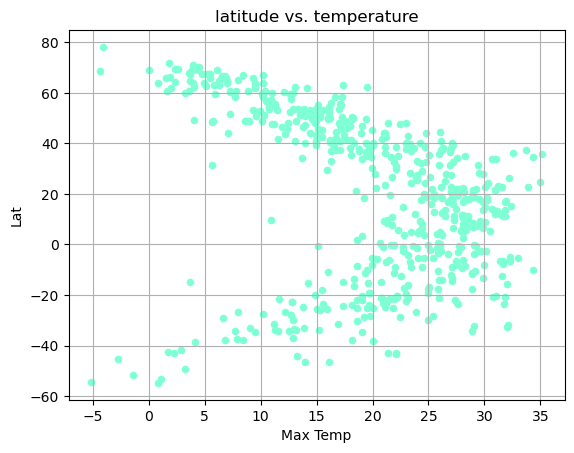

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Max Temp', y='Lat', grid=True, color = 'aquamarine',
              title='latitude vs. temperature')

# Incorporate the other graph properties
x_temp = city_data_df['Max Temp']
y_lat = city_data_df['Lat']

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

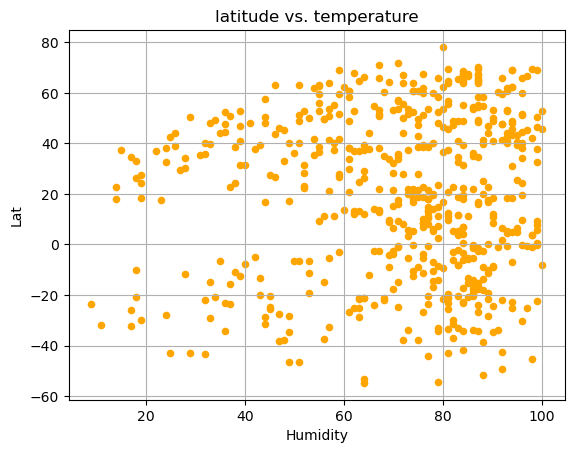

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Humidity', y='Lat', grid=True, color = 'orange',
              title='latitude vs. temperature')

# Incorporate the other graph properties
x_humidity = city_data_df['Humidity']


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

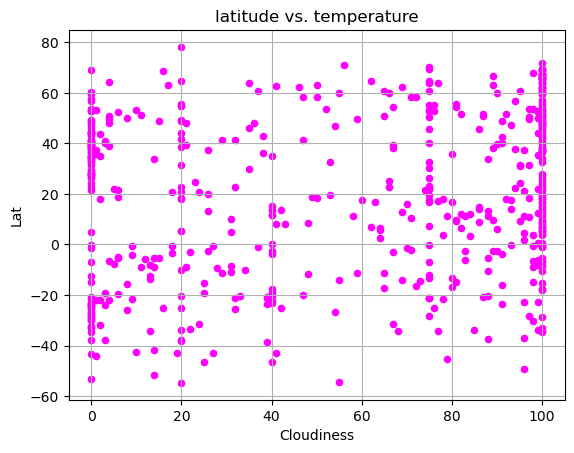

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Cloudiness', y='Lat', grid=True, color = 'magenta',
              title='latitude vs. temperature')

# Incorporate the other graph properties
x_cloudiness = city_data_df['Cloudiness']

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

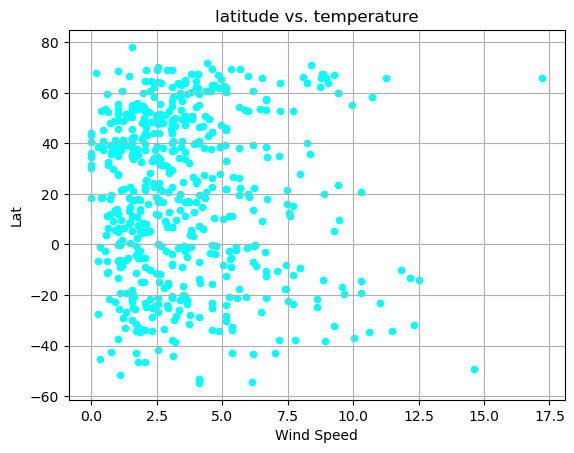

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Wind Speed', y='Lat', grid=True, color = 'cyan',
              title='latitude vs. temperature')

# Incorporate the other graph properties
x_wind_speed = city_data_df['Wind Speed']

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,dudinka,69.4058,86.1778,2.57,87,100,5.70,RU,1695091323
5,kailua-kona,19.6406,-155.9956,28.98,84,100,5.66,US,1695091323
10,howrah,22.5892,88.3103,27.00,89,75,3.09,IN,1695091325
13,ribeira grande,38.5167,-28.7000,22.10,76,100,4.92,PT,1695091326
14,kodiak,57.7900,-152.4072,12.73,44,0,6.69,US,1695091326


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.64,97,27,2.68,EC,1695091322
1,bengkulu,-3.8004,102.2655,26.73,76,91,4.72,ID,1695091322
2,tsiombe,-25.3000,45.4833,19.51,97,42,2.31,MG,1695091322
3,punta arenas,-53.1500,-70.9167,1.06,64,0,4.12,CL,1695091323
6,lautoka,-17.6167,177.4667,28.92,70,40,5.66,FJ,1695091324


###  Temperature vs. Latitude Linear Regression Plot

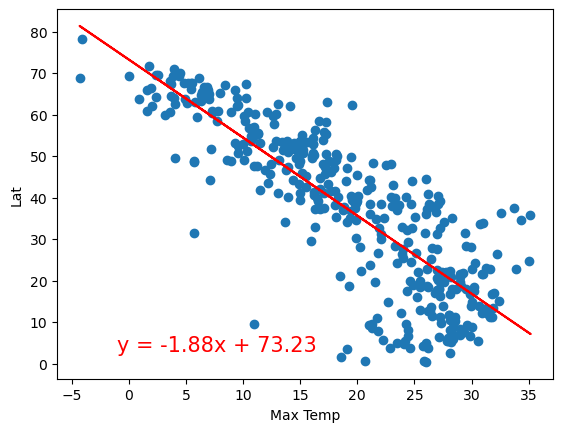

In [19]:
# Linear regression on Northern Hemisphere
slope, y_int, r, p, se = stats.linregress(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_int,2))
t_fit = slope * northern_hemi_df['Max Temp'] + y_int

plt.scatter(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])
plt.plot(northern_hemi_df['Max Temp'],t_fit,"r-")
plt.annotate(line_eq,(-1,3),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.savefig("output_data/north_temp_vs_lat.png")
plt.show()

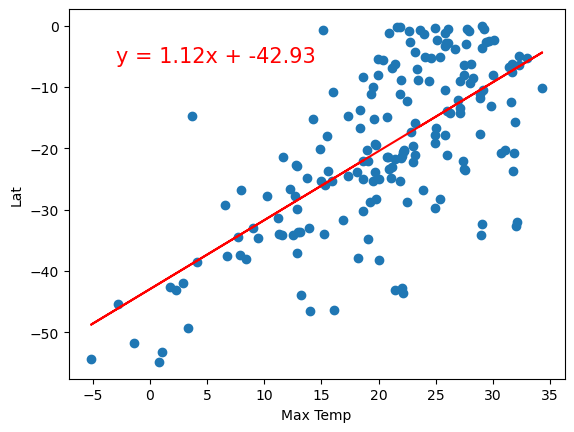

In [20]:
# Linear regression on Southern Hemisphere
slope, y_int, r, p, se = stats.linregress(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_int,2))
t_fit = slope * southern_hemi_df['Max Temp'] + y_int

plt.scatter(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])
plt.plot(southern_hemi_df['Max Temp'],t_fit,"r-")
plt.annotate(line_eq,(-3,-6),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.savefig("output_data/south_temp_vs_lat.png")
plt.show()

**Discussion about the linear relationship:** As the absolute value of Latitude increased, the Max Temp decreased. There was a strong negative relationship above the equator and a strong positive relationship below the equator. The difference is the y intercepts. We should use the absolute value of "Lat" when reading these graphs because the negative values are just categorizing that the location is in the southern hemisphere. As the location moves farther away from zero the maximum temperature goes down. 

### Humidity vs. Latitude Linear Regression Plot

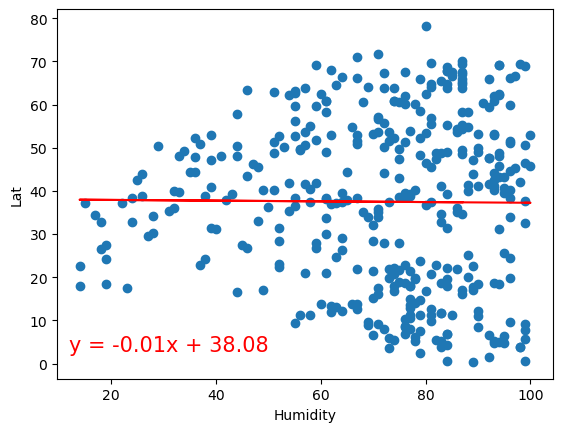

In [22]:
# Northern Hemisphere
slope, y_int, r, p, se = stats.linregress(northern_hemi_df['Humidity'], northern_hemi_df['Lat'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_int,2))
t_fit = slope * northern_hemi_df['Humidity'] + y_int

plt.scatter(northern_hemi_df['Humidity'], northern_hemi_df['Lat'])
plt.plot(northern_hemi_df['Humidity'],t_fit,"r-")
plt.annotate(line_eq,(12,3),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.savefig("output_data/north_humid_vs_lat.png")
plt.show()

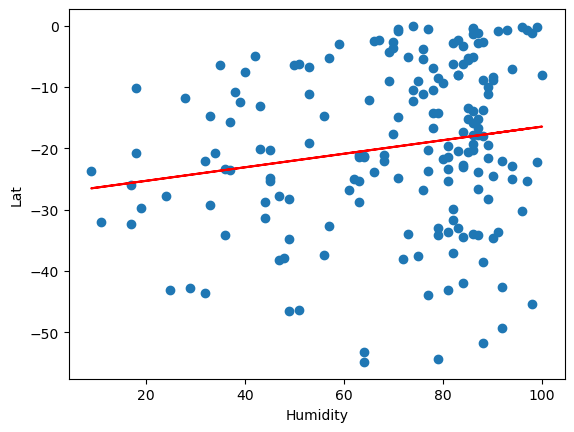

In [23]:
# Southern Hemisphere
slope, y_int, r, p, se = stats.linregress(southern_hemi_df['Humidity'], southern_hemi_df['Lat'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_int,2))
t_fit = slope * southern_hemi_df['Humidity'] + y_int

plt.scatter(southern_hemi_df['Humidity'], southern_hemi_df['Lat'])
plt.plot(southern_hemi_df['Humidity'],t_fit,"r-")
plt.annotate(line_eq,(3,-52),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.savefig("output_data/south_humid_vs_lat.png")
plt.show()

**Discussion about the linear relationship:** This shows a weak negative correlation between the absolute value of Lat and Humidity but after running the code a few times, there was occasionally a positive correlation. This correlation is not significant.

### Cloudiness vs. Latitude Linear Regression Plot

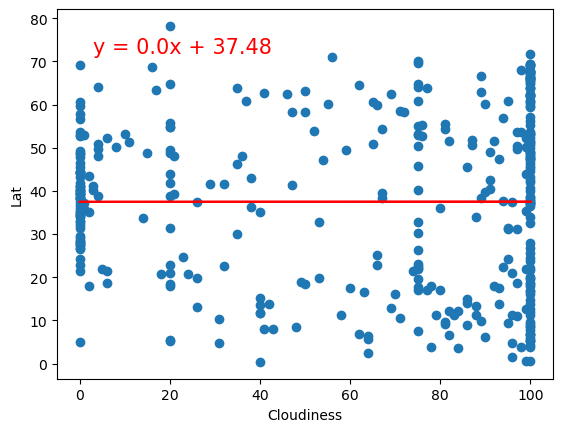

In [24]:
# Northern Hemisphere
slope, y_int, r, p, se = stats.linregress(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_int,2))
t_fit = slope * northern_hemi_df['Cloudiness'] + y_int

plt.scatter(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'])
plt.plot(northern_hemi_df['Cloudiness'],t_fit,"r-")
plt.annotate(line_eq,(3,72),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.savefig("output_data/north_cloud_vs_lat.png")
plt.show()

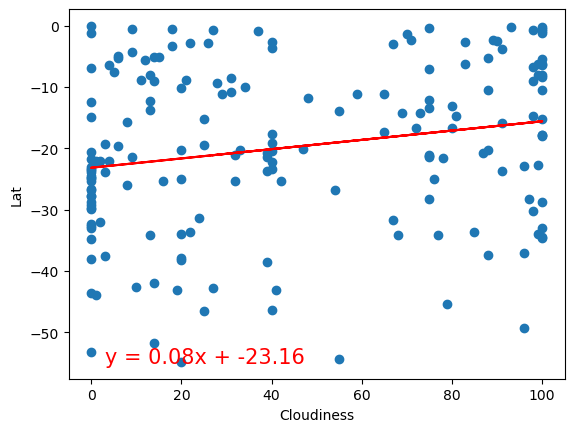

In [25]:
# Southern Hemisphere
slope, y_int, r, p, se = stats.linregress(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_int,2))
t_fit = slope * southern_hemi_df['Cloudiness'] + y_int

plt.scatter(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'])
plt.plot(southern_hemi_df['Cloudiness'],t_fit,"r-")
plt.annotate(line_eq,(3,-55),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.savefig("output_data/south_cloud_vs_lat.png")
plt.show()

**Discussion about the linear relationship:** There is no significant relationship between Lat and Cloudiness. After running the code multiple times, the most common slope was 0.0.

### Wind Speed vs. Latitude Linear Regression Plot

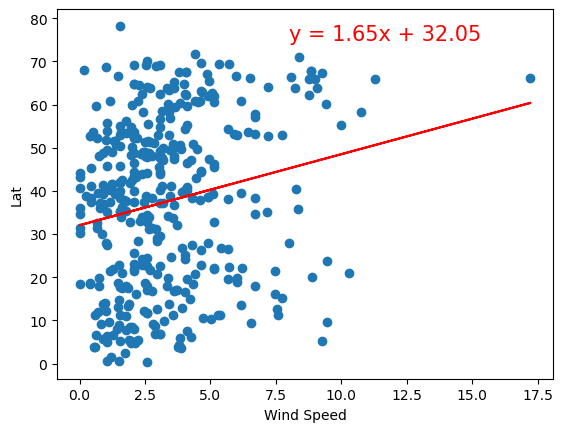

In [27]:
# Northern Hemisphere
slope, y_int, r, p, se = stats.linregress(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_int,2))
t_fit = slope * northern_hemi_df['Wind Speed'] + y_int

plt.scatter(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'])
plt.plot(northern_hemi_df['Wind Speed'],t_fit,"r-")
plt.annotate(line_eq,(8,75),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.savefig("output_data/north_wind_vs_lat.png")
plt.show()

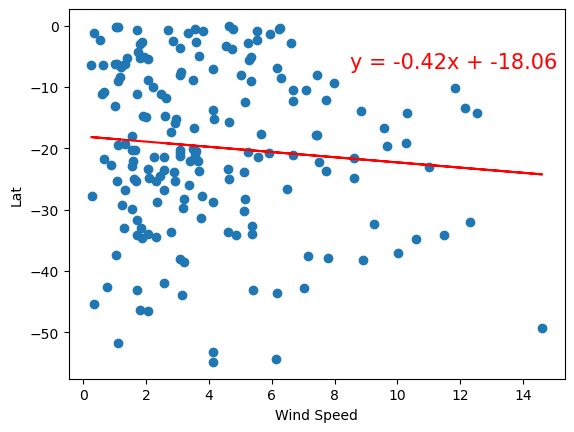

In [29]:
# Southern Hemisphere
slope, y_int, r, p, se = stats.linregress(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_int,2))
t_fit = slope * southern_hemi_df['Wind Speed'] + y_int

plt.scatter(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'])
plt.plot(southern_hemi_df['Wind Speed'],t_fit,"r-")
plt.annotate(line_eq,(8.5,-7),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.savefig("output_data/south_cloud_vs_lat.png")
plt.show()

**Discussion about the linear relationship:** This data shows a strong positive relationship in the northern hemisphere and a positive relationship in the southern hemisphere using the absolute value of Lat. However, after running multiple times, the same results rarely occured. There is a lot of variability in this data. There is not a significant relationship.